In [1]:
import numpy as np
import pandas as pd

In [2]:
import csv as cv
import os
import matplotlib.pyplot as plt
import re
import csv
import time
import pandas as pd
from pandas import Series
from random import randint
from scipy.signal import correlate
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import LeaveOneOut 
import warnings
warnings.filterwarnings('ignore')


### PART 1
#### Point 1.1
Process the Wikipedia pageview data for the "Influenza" page of the Italian
Wikipedia (https://it.wikipedia.org/wiki/Influenza), aggregate the pageviews
on a weekly time scale, and plot the resulting time series of page views
for the current year and - ideally - also for previous years.

In [9]:
Ground_Truth_Path="./Influent/Inf"
Wiki_Data_Path="./DEDATA/HWDE/Wiki/"

In [147]:
import os
#list_years = ["2003-2004","2004-2005","2005-2006","2006-2007","2007-2008","2008-2009","2009-2010","2010-2011","2011-2012","2012-2013"]
#this part we get the ground truth data
list_years = ["2014-2015","2015-2016","2016-2017","2017-2018"]
def data_ground_truth_aggregator(path):
    df_list = []
    for year in list_years:
        g_data = pd.read_csv(path+str(year)+'.csv',usecols=['Incidenza'])
        g_data = g_data.dropna()
        #g_data = g_data.set_index("Settimana")
        #g_data.index=[g_data.index.str.split('-')[i][1] for i in range(140)]
        df_list.append(g_data)      
    result = pd.concat(df_list, axis = 1)
    result.columns = list_years
    return result


gdf=data_ground_truth_aggregator(Ground_Truth_Path)

In [148]:
gdf.head()

,2014-2015,2015-2016,2016-2017,2017-2018
0,0.35,0.40,0.59,0.89
1,0.48,0.50,0.71,0.85
2,0.65,0.68,0.81,0.95
3,0.81,0.76,0.98,1.24
4,0.85,0.88,1.25,1.60


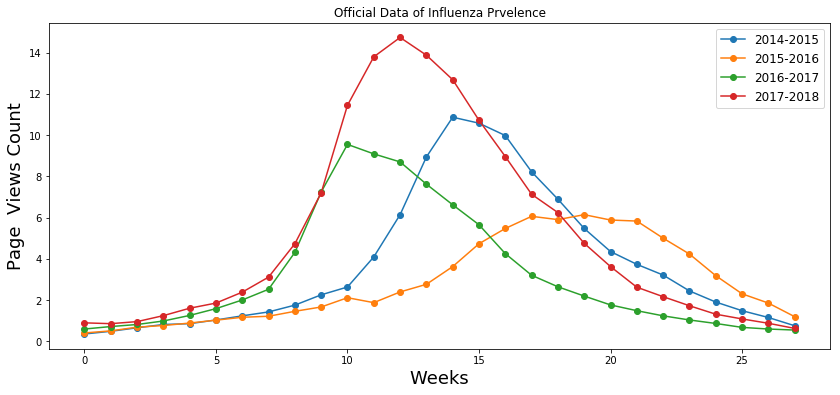

In [149]:
plt.figure(figsize=(14,6))
plt.plot([( row['2014-2015'], row['2015-2016'], row['2016-2017'],row['2017-2018']
          ) for index, row in gdf.iterrows()], 'o-')
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Page  Views Count', fontsize=18)
plt.title('Official Data of Influenza Prvelence')
plt.legend(['2014-2015', '2015-2016', '2016-2017', '2017-2018'], fontsize=12, loc='upperleft')
plt.show()

#### ----------------------------------------------------------------------------------------------------------------------------------------------------

### Part 2
### Point 2.1
Try to find other Wikipedia pages related to flu whose pageview time series
	are correlated with the Influnet signal. For example, you could consider
	the pages linked from the "Influenza" page, such as symptom pages:
		- https://it.wikipedia.org/wiki/Febbre
		- https://it.wikipedia.org/wiki/Rinorrea
		- https://it.wikipedia.org/wiki/Mialgia
		- https://it.wikipedia.org/wiki/Cefalea
		- https://it.wikipedia.org/wiki/Vomito
	pages corresponding to medications for fever:
		- https://it.wikipedia.org/wiki/Paracetamolo
	and pages devoted to flu vaccines:
		- https://it.wikipedia.org/wiki/Vaccino_antinfluenzale#Vaccino_influenza_stagionale
	Use any strategy you think is appropriate to choose these pages.
	Compute their weekly pageview time series for the last year
	and - if possible - for the previous years,
	and plot them together with the Influnet signal as in 1.1.

In [7]:
pages_names=['Influenza','Febbre','Rinorrea','Mialgia','Cefalea','Vomito','Vaccino influenza stagionale',
             'Vaccino antinfluenzale','Amantadina','Antivirale','Artralgia','Influenza aviaria','Influenzavirus A',
             'Influenzavirus A sottotipo H1N1','Virus dell\'influenza A sottotipo H1N1',
             'Zanamivir','Influenza spagnola','Influenza e fortuna del pensiero di Nietzsche']

In [47]:
#keywords=['Date','Influenza','Febbre','Rinorrea','Mialgia','Cefalea','Vomito','Vaccino influenza stagionale','Vaccino antinfluenzale','Amantadina','Antivirale']
def data_wiki_pageviews_aggregator(paths):
    result=pd.DataFrame()
    for path in paths:
        g_data = pd.read_csv(path)
        '''here you have to add the date column'''
        g_data = g_data.dropna()
        result=pd.concat([result,g_data],axis=1)
        result= result.loc[:,~result.columns.duplicated()]
    return result

paths=['2018I10.csv','2018A10.csv','2017I10.csv','2017A10.csv','2016I10.csv','2016A10.csv','2015I10.csv','2015A10.csv']
data2018=data_wiki_pageviews_aggregator(paths[0:2])
data2017=data_wiki_pageviews_aggregator(paths[2:4])
data2016=data_wiki_pageviews_aggregator(paths[4:6])
data2015=data_wiki_pageviews_aggregator(paths[6:8])

In [48]:
data2018.dropna().head(3)

,Date,Influenza,Febbre,Rinorrea,Mialgia,Cefalea,Vomito,Vaccino influenza stagionale,Vaccino antinfluenzale,Amantadina,Antivirale,Artralgia,Influenza aviaria,Influenzavirus A,Influenzavirus A sottotipo H1N1,Virus dell'influenza A sottotipo H1N1,Zanamivir,Influenza spagnola,Influenza e fortuna del pensiero di Nietzsche
0,2018-01-01,528.0,666.0,47.0,93.0,192.0,210.0,0.0,79.0,34.0,70.0,40,127,56,179,18,15,457,8
1,2018-01-02,719.0,927.0,80.0,123.0,254.0,212.0,0.0,82.0,57.0,71.0,64,144,60,179,11,15,522,12
2,2018-01-03,890.0,923.0,54.0,144.0,253.0,186.0,0.0,95.0,70.0,74.0,85,195,82,301,22,29,1070,12


In [49]:
def week_scale(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data=data.resample('W-MON', on='Date').sum()
    return data

In [50]:
data2018=week_scale(data2018.dropna())
data2017=week_scale(data2017.dropna())
data2016=week_scale(data2016.dropna())
data2015=week_scale(data2015.dropna())

In [51]:
data2018.head(5)

,Influenza,Febbre,Rinorrea,Mialgia,Cefalea,Vomito,Vaccino influenza stagionale,Vaccino antinfluenzale,Amantadina,Antivirale,Artralgia,Influenza aviaria,Influenzavirus A,Influenzavirus A sottotipo H1N1,Virus dell'influenza A sottotipo H1N1,Zanamivir,Influenza spagnola,Influenza e fortuna del pensiero di Nietzsche
Date,,,,,,,,,,,,,,,,,,
2018-01-01,528.0,666.0,47.0,93.0,192.0,210.0,0.0,79.0,34.0,70.0,40,127,56,179,18,15,457,8
2018-01-08,6227.0,6125.0,469.0,1180.0,1886.0,1285.0,4.0,692.0,433.0,553.0,725,1833,624,7858,162,212,4702,92
2018-01-15,5113.0,5148.0,473.0,926.0,2396.0,1126.0,9.0,669.0,519.0,511.0,587,1272,648,3074,147,184,3309,153
2018-01-22,5037.0,4603.0,547.0,836.0,2055.0,1143.0,3.0,786.0,486.0,471.0,524,1301,544,2517,126,153,4105,145
2018-01-29,3921.0,4828.0,477.0,863.0,2019.0,1205.0,4.0,487.0,547.0,397.0,472,1295,521,2449,149,166,3988,145


In [103]:
all_year_data=pd.concat([data2018,data2017,data2016,data2015])

In [33]:
all_year_data.head(3)

,Influenza,Febbre,Rinorrea,Mialgia,Cefalea,Vomito,Vaccino influenza stagionale,Vaccino antinfluenzale,Amantadina,Antivirale,Artralgia,Influenza aviaria,Influenzavirus A,Influenzavirus A sottotipo H1N1,Virus dell'influenza A sottotipo H1N1,Zanamivir,Influenza spagnola,Influenza e fortuna del pensiero di Nietzsche
Date,,,,,,,,,,,,,,,,,,
2018-01-01,528.0,666.0,47.0,93.0,192.0,210.0,0.0,79.0,34.0,70.0,40,127,56,179,18,15,457,8
2018-01-08,6227.0,6125.0,469.0,1180.0,1886.0,1285.0,4.0,692.0,433.0,553.0,725,1833,624,7858,162,212,4702,92
2018-01-15,5113.0,5148.0,473.0,926.0,2396.0,1126.0,9.0,669.0,519.0,511.0,587,1272,648,3074,147,184,3309,153


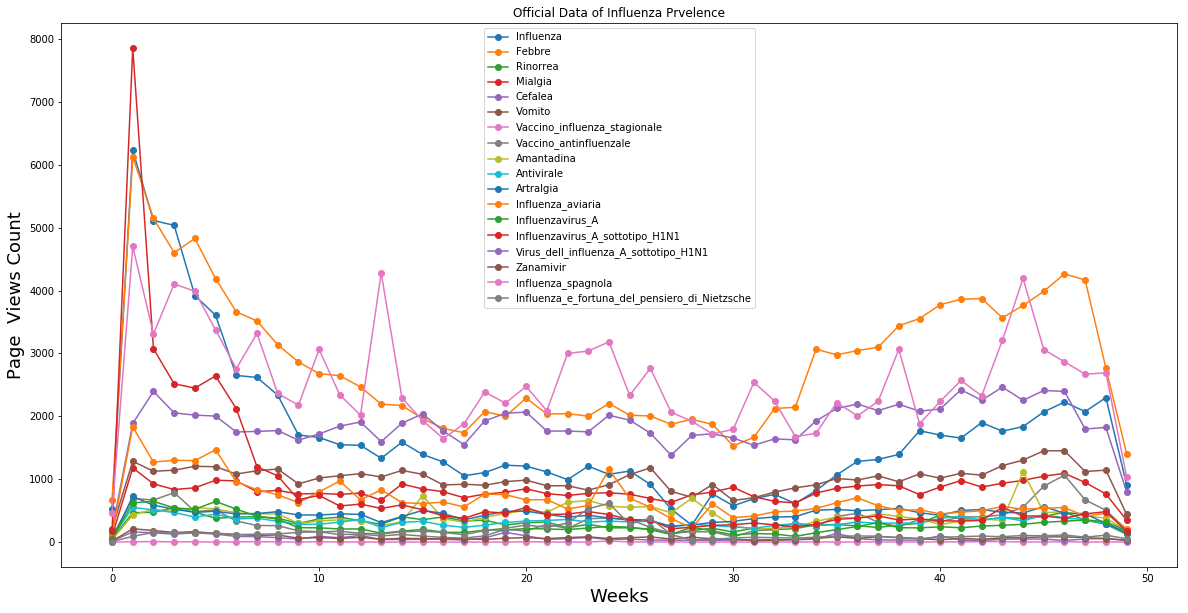

In [37]:
plt.figure(figsize=(20,10))
plt.plot([( row['Influenza'], row['Febbre'], row['Rinorrea'],row['Mialgia'],row['Cefalea'],
            row['Vomito'], row['Vaccino influenza stagionale'], row['Vaccino antinfluenzale'],row['Amantadina'],row['Antivirale'],
            row['Artralgia'], row['Influenza aviaria'], row['Influenzavirus A'],row['Influenzavirus A sottotipo H1N1'],row['Virus dell\'influenza A sottotipo H1N1'],
            row['Zanamivir'], row['Influenza spagnola'], row['Influenza e fortuna del pensiero di Nietzsche']
          ) for index, row in data2018.iterrows()], 'o-')
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Page  Views Count', fontsize=18)
plt.title('Official Data of Influenza Prvelence')
plt.legend(pages_names, fontsize=10, loc='upperleft')
plt.show()

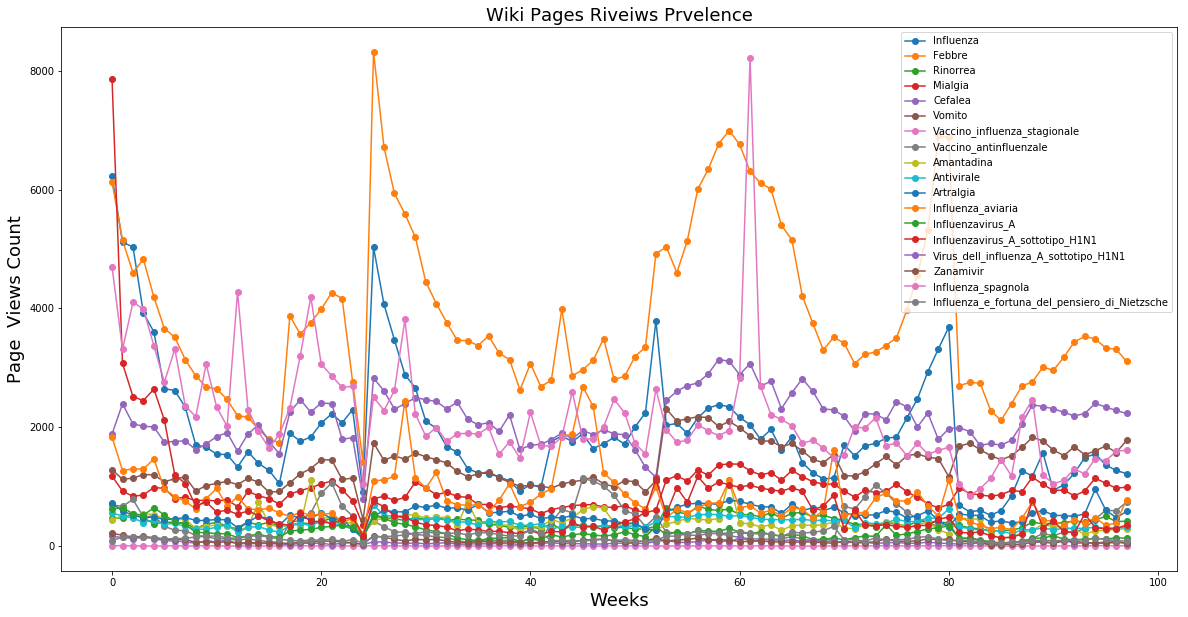

In [47]:
plt.figure(figsize=(20,10))
plt.plot([( row['Influenza'], row['Febbre'], row['Rinorrea'],row['Mialgia'],row['Cefalea'],
            row['Vomito'], row['Vaccino influenza stagionale'], row['Vaccino antinfluenzale'],row['Amantadina'],row['Antivirale'],
            row['Artralgia'], row['Influenza aviaria'], row['Influenzavirus A'],row['Influenzavirus A sottotipo H1N1'],row['Virus dell\'influenza A sottotipo H1N1'],
            row['Zanamivir'], row['Influenza spagnola'], row['Influenza e fortuna del pensiero di Nietzsche']
          ) for index, row in all_year_data.iterrows()], 'o-')
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Page  Views Count', fontsize=18)
plt.title('Wiki Pages Riveiws Prvelence', fontsize=18)
plt.legend(pages_names, fontsize=10, loc='upperleft')
plt.show()

    2.2 - For each of the selected Wikipedia pages, compute the same correlation
	with the Influnet time series that you computed in 1.2.
	Which of these correlations are strongest ?
	Did you discover a better page than "Influenza"
	in terms of correlation with the ground truth ?

#### To compute the correlation we have to remove weeks from data that are not in official data

In [52]:
weeks_numbers=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,42,43,44,45,46,47,48,49,50,51,52]

In [53]:
def get_official_week(data,weeks_numbers):
    d=pd.DataFrame(pd.Series([i for i in range(len(data))]))
    data['weeknum'] = d.iloc[:,0].values
    data=data.loc[data.weeknum.isin(weeks_numbers)]
    return data

In [54]:
data2018=get_official_week(data2018,weeks_numbers)
data2017=get_official_week(data2017,weeks_numbers)
data2016=get_official_week(data2016,weeks_numbers)
data2015=get_official_week(data2015,weeks_numbers)

In [111]:
data2018.head(3)

,Influenza,Febbre,Rinorrea,Mialgia,Cefalea,Vomito,Vaccino influenza stagionale,Vaccino antinfluenzale,Amantadina,Antivirale,Artralgia,Influenza aviaria,Influenzavirus A,Influenzavirus A sottotipo H1N1,Virus dell'influenza A sottotipo H1N1,Zanamivir,Influenza spagnola,Influenza e fortuna del pensiero di Nietzsche,weeknum
Date,,,,,,,,,,,,,,,,,,,
2018-01-08,6227.0,6125.0,469.0,1180.0,1886.0,1285.0,4.0,692.0,433.0,553.0,725,1833,624,7858,162,212,4702,92,1
2018-01-15,5113.0,5148.0,473.0,926.0,2396.0,1126.0,9.0,669.0,519.0,511.0,587,1272,648,3074,147,184,3309,153,2
2018-01-22,5037.0,4603.0,547.0,836.0,2055.0,1143.0,3.0,786.0,486.0,471.0,524,1301,544,2517,126,153,4105,145,3


In [108]:
all_year_data=pd.concat([data2018,data2017,data2016,data2015])

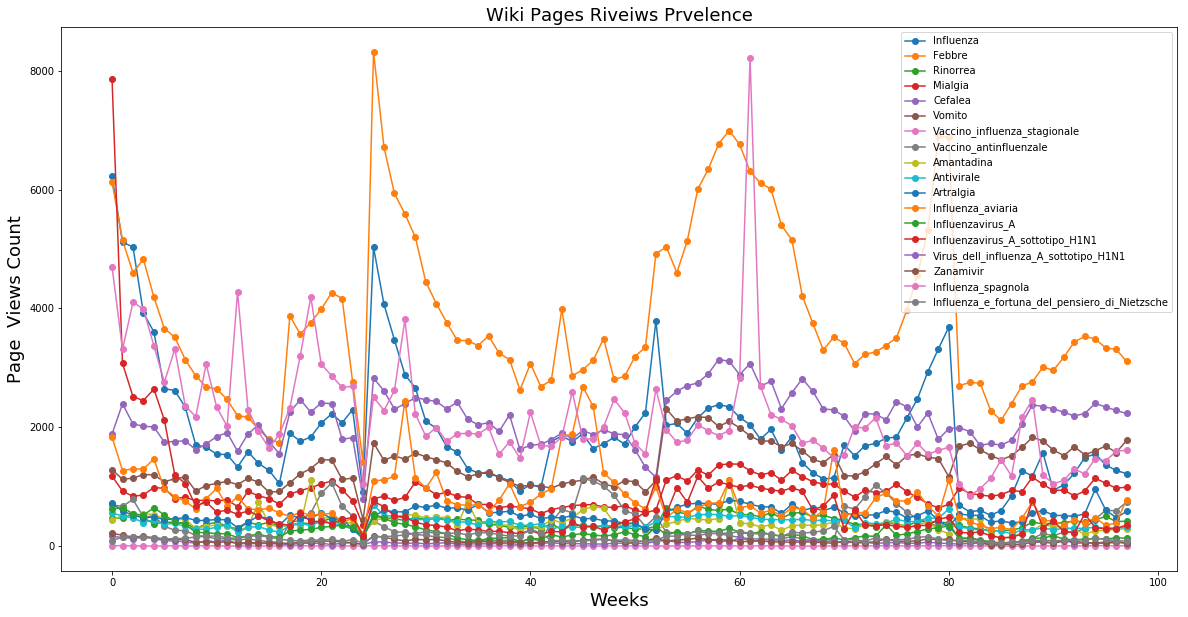

In [48]:
plt.figure(figsize=(20,10))
plt.plot([( row['Influenza'], row['Febbre'], row['Rinorrea'],row['Mialgia'],row['Cefalea'],
            row['Vomito'], row['Vaccino influenza stagionale'], row['Vaccino antinfluenzale'],row['Amantadina'],row['Antivirale'],
            row['Artralgia'], row['Influenza aviaria'], row['Influenzavirus A'],row['Influenzavirus A sottotipo H1N1'],row['Virus dell\'influenza A sottotipo H1N1'],
            row['Zanamivir'], row['Influenza spagnola'], row['Influenza e fortuna del pensiero di Nietzsche']
          ) for index, row in all_year_data.iterrows()], 'o-')
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Page  Views Count', fontsize=18)
plt.title('Wiki Pages Riveiws Prvelence', fontsize=18)
plt.legend(pages_names, fontsize=10, loc='upperleft')
plt.show()

In [179]:
def get_correlated_with_Influenza(data,pages_names):
    corr=dict()
    for name in pages_names[1:len(pages_names)]:
        corr[name]=np.corrcoef(data[name],data['Influenza'])[0,1]
    return corr

In [141]:
corr=get_correlated_with_Influenza(all_year_data,pages_names)

In [143]:
corr=pd.DataFrame.from_dict(corr,orient='index')

In [144]:
corr.sort_values(0, ascending=False)

,0
Influenzavirus A,0.892971
Zanamivir,0.869356
Influenzavirus A sottotipo H1N1,0.696337
Febbre,0.673146
Antivirale,0.655001
Virus dell'influenza A sottotipo H1N1,0.534677
Influenza spagnola,0.484947
Influenza aviaria,0.445894
Rinorrea,0.359747
Vaccino antinfluenzale,0.334760


In [185]:
def get_correlated_with_GD(data,pages_names,year):
    corr=dict()
    for name in pages_names:
        corr[name]=np.corrcoef(data[name],gdf[year][0:len(data)])[0,1]
    return corr

In [186]:
corr=get_correlated_with_GD(data2017,pages_names,'2016-2017')
corr=pd.DataFrame.from_dict(corr,orient='index')
corr.sort_values(0, ascending=False).head(5)

,0
Influenza e fortuna del pensiero di Nietzsche,0.510600
Artralgia,0.408638
Vaccino influenza stagionale,-0.019602
Cefalea,-0.055403
Rinorrea,-0.073494


In [187]:
corr=get_correlated_with_GD(data2018,pages_names,'2017-2018')
corr=pd.DataFrame.from_dict(corr,orient='index')
corr.sort_values(0, ascending=False).head(5)

,0
Influenza e fortuna del pensiero di Nietzsche,0.451070
Cefalea,-0.078811
Vomito,-0.176162
Amantadina,-0.180944
Artralgia,-0.211738


In [188]:
corr=get_correlated_with_GD(data2016,pages_names,'2015-2016')
corr=pd.DataFrame.from_dict(corr,orient='index')
corr.sort_values(0, ascending=False).head(5)

,0
Vaccino antinfluenzale,0.699629
Influenza aviaria,0.166628
Vaccino influenza stagionale,0.045619
Influenza spagnola,-0.207034
Amantadina,-0.240101


In [190]:
corr=get_correlated_with_GD(data2015,pages_names,'2014-2015')
corr=pd.DataFrame.from_dict(corr,orient='index')
corr.sort_values(0, ascending=False).head(5)

,0
Vaccino antinfluenzale,0.957866
Rinorrea,0.774139
Febbre,0.722202
Influenza,0.639541
Cefalea,0.594652




* PART 3 (15 points)

	3.1 - Build a regression model that predicts the Influnet incidence
	for a given week based on the Wikipedia pageview data for the same week.
	Your features are the Wikipedia pageview counts for the "Influenza" page,
	for all the pages you have selected in Part 2,
	and for any other page that you think might help (there are probably
	global trends that have nothing to do with influenza,
	and you might think of ways to control for them in your model.)
	Carry out any feature selection you think it's appropriate.
	Evaluate the performance of your model via cross-validation.


In [214]:
def pred_model(mod, X_train, X_test, y_train, y_test):
    mod.fit(X_train.reshape(-1, 1), y_train)
    #error = cross_val_score(estimator = mod, X = X_train.reshape(-1, 1), y = y_train, cv = 10, scoring = "neg_mean_squared_error")
    y_pred = mod.predict(X_test.reshape(-1, 1))
    print(y_pred)
    print(y_test)
    return metrics.r2_score(y_test, y_pred)
def pred_week(mod,X_train, X_test, y_train, y_test):
    mod.fit(X_train.reshape(-1, 1), y_train)
    error = cross_val_score(estimator = mod, X = X_train.reshape(-1, 1), y = y_train, cv = 10, scoring = "neg_mean_squared_error")
    week_to_predict = 75
    idx = all_data.index.tolist().index(week_to_predict)
    y_pred = mod.predict(X[idx].reshape(1, -1))[0]#[0]
    print("Prediction of week " + str(week_to_predict) +": " +str(y_pred))
    print("Real Value of week " + str(week_to_predict) +": " +str(y[idx][0]))
    print("\n")
def presict_model(models,X,y):
    means=[]
    loo = LeaveOneOut()
    for model in models:
        score=[]
        loo.get_n_splits(X)
        for train_index, test_index in loo.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            score.append(pred_model(model, X_train, X_test, y_train, y_test))
        means.append(np.mean(score))
    return means           

In [161]:
error = cross_val_score(estimator = linear_model.LinearRegression(), X = X_train.reshape(-1, 1), y = y_train, cv = 10, scoring = "neg_mean_squared_error")

In [176]:
predictions = cross_val_predict( linear_model.LinearRegression(), X = X.reshape(-1, 1), y = y, cv=6)

In [177]:
np.mean(error)

-9.329841557944217

In [178]:
from sklearn import metrics

In [180]:
accuracy = metrics.r2_score(y, predictions)

In [181]:
accuracy

0.03491892646828021

In [56]:
'''putting the ground truth data together'''
list_years = ["2015-2016","2016-2017","2017-2018"]
def data_ground_truth_concat(path):
    df_list = []
    for year in list_years:
        g_data = pd.read_csv(path+str(year)+'.csv',usecols=['Incidenza'])
        g_data = g_data.dropna()
        df_list.append(g_data)      
    result = pd.concat(df_list, axis = 0).reset_index(drop=True)
    return result
all_gdf=data_ground_truth_concat(Ground_Truth_Path)

In [57]:
all_gdf.head(3)

,Incidenza
0,0.40
1,0.50
2,0.68


In [61]:
all_gdf=all_gdf[0:81]

In [58]:
all_data = pd.concat([data2016,data2017,data2018], axis = 0).reset_index(drop=True)

In [60]:
all_data.head()

,Influenza,Febbre,Rinorrea,Mialgia,Cefalea,Vomito,Vaccino influenza stagionale,Vaccino antinfluenzale,Amantadina,Antivirale,Artralgia,Influenza aviaria,Influenzavirus A,Influenzavirus A sottotipo H1N1,Virus dell'influenza A sottotipo H1N1,Zanamivir,Influenza spagnola,Influenza e fortuna del pensiero di Nietzsche,weeknum
0,2033.0,5033.0,648.0,1117.0,2452.0,2306.0,1.0,233.0,365.0,499.0,574,474,184,547,99,84,1955,167,1
1,2065.0,4603.0,583.0,1182.0,2606.0,2105.0,2.0,224.0,418.0,492.0,651,624,244,986,63,102,1749,168,2
2,1899.0,5139.0,531.0,1095.0,2702.0,2144.0,1.0,190.0,462.0,483.0,707,563,203,736,61,112,1780,209,3
3,2157.0,6010.0,674.0,1280.0,2745.0,2176.0,5.0,177.0,455.0,526.0,721,644,264,1173,75,134,2044,250,4
4,2324.0,6341.0,619.0,1194.0,2901.0,2163.0,1.0,210.0,438.0,535.0,716,723,253,972,103,107,1942,218,5


In [63]:
Influent=all_data['Influenza']

In [64]:
y=all_gdf.values

In [65]:
X=all_data['Influenza'].values

In [68]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [164]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [120]:
def pred_model(mod, X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    mod.fit(X_train.reshape(-1, 1), y_train)
    error = cross_val_score(estimator = mod, X = X_train.reshape(-1, 1), y = y_train, cv = 10, scoring = "neg_mean_squared_error")
    y_pred = mod.predict(X_test.reshape(-1, 1))
    return r2_score(y_true=y_test, y_pred=y_pred)

In [145]:
def pred_week(mod,X,y,week):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    mod.fit(X_train.reshape(-1, 1), y_train)
    error = cross_val_score(estimator = mod, X = X_train.reshape(-1, 1), y = y_train, cv = 10, scoring = "neg_mean_squared_error")
    week_to_predict = week
    idx = all_data.index.tolist().index(week_to_predict)
    y_pred = mod.predict(X[idx].reshape(1, -1))[0]#[0]
    print("Prediction of week " + str(week_to_predict) +": " +str(y_pred))
    print("Real Value of week " + str(week_to_predict) +": " +str(y[idx][0]))
    print("\n")

In [182]:
pred_model(linear_model.LinearRegression(),X,y)

0.2552517373355925

In [183]:
pred_week(linear_model.LinearRegression(n_jobs=-1),X,y)

Prediction of week 75: [4.27796979]
Real Value of week 75: 4.75




In [184]:
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X.reshape(-1, 1), y)
clf.score(X.reshape(-1, 1), y) 

0.24995848374541008

In [185]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [186]:
for train_index, test_index in kf.split(X):
     print("TRAIN:", train_index, "“TEST:”", test_index)

TRAIN: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80] “TEST:” [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40] “TEST:” [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80]


	3.2 - Add these features to your model:
	- the Influnet incidence for the week preceding the target week
	- the pageview counts for all the pages you selected for the week preceding the target week
	Re-train your model and evaluate its performance via cross-validation.
	Did it improve ?
	How does it compare with the results reported in article [1] ?